In [1]:
'''Load Packages'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
from sklearn.cluster import KMeans 
import random
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [2]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

In [28]:
suv0 = pd.read_csv('clustersGrouped/sedanCluster0.csv')
suv1 = pd.read_csv('clustersGrouped/sedanCluster1.csv')
suv2 = pd.read_csv('clustersGrouped/sedanCluster2.csv')
suv3 = pd.read_csv('clustersGrouped/sedanCluster3.csv')
suv4 = pd.read_csv('clustersGrouped/sedanCluster4.csv')
suv0['cluster_label'] = 'suv0'
suv1['cluster_label'] = 'suv1'
suv2['cluster_label'] = 'suv2'
suv3['cluster_label'] = 'suv3'
suv4['cluster_label'] = 'suv4'
suv_dfs = [suv0,suv1,suv2,suv3,suv4]

### Cluster Counts

<BarContainer object of 5 artists>

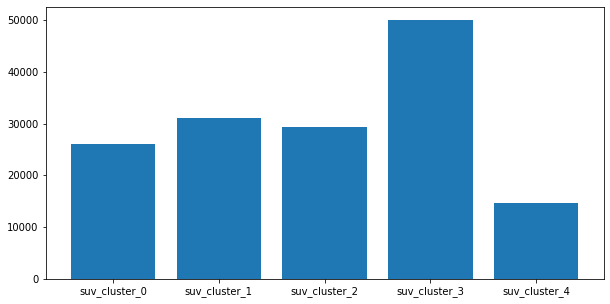

In [29]:
plt.figure(figsize=(10,5))
counts = {}
for i,df in enumerate(suv_dfs):
    counts['suv_cluster_{}'.format(i)] = df.shape[0]
counts
plt.bar(counts.keys(), counts.values())

### Purchase Make

In [77]:
one_df = pd.concat(suv_dfs)
test = one_df.groupby(['cluster_label','purchase_make']).count().reset_index()
test = test.sort_values(by=['cluster_label','purchase_model'],ascending=[True,False])
test = test.groupby('cluster_label').head(10)[['cluster_label','purchase_model','purchase_make']]
test = test[test.purchase_model>2000]
test.pivot(index = 'purchase_make',columns='cluster_label',values='purchase_model').fillna(0).style.highlight_max(color = 'green').format(int)

cluster_label,suv0,suv1,suv2,suv3,suv4
purchase_make,,,,,
BMW,0,0,4247,2267,0
CHEVROLET,2592,0,2205,13026,0
CHRYSLER,0,0,0,2745,0
DODGE,0,0,0,4495,0
FORD,2668,7484,2112,0,0
HYUNDAI,0,0,0,0,10974
INFINITI,0,2381,0,0,0
KIA,0,0,0,0,3632
LEXUS,0,2640,2023,0,0


### Humor Me

In [98]:
test = one_df.groupby(['cluster_label','customer_gender','purchase_make']).count().reset_index()
test = test.sort_values(by=['cluster_label','customer_gender','purchase_model'],ascending=[True,True,False])
test.groupby(['cluster_label','customer_gender']).head(1)

,cluster_label,customer_gender,purchase_make,purchase_model,purchase_vehicle_year,purchase_price_LB,trade_in,vehicle_financing,customer_income,AgeBin,made_in,job_assign,Labels
18,suv0,F,NISSAN,1744,1744,1744,1744,1744,1744,1744,1744,1744,1744
46,suv0,M,NISSAN,1815,1815,1815,1815,1815,1815,1815,1815,1815,1815
75,suv0,U,NISSAN,470,470,470,470,470,470,470,470,470,470
99,suv1,F,TOYOTA,5729,5729,5729,5729,5729,5729,5729,5729,5729,5729
119,suv1,M,TOYOTA,4675,4675,4675,4675,4675,4675,4675,4675,4675,4675
134,suv1,U,TOYOTA,1647,1647,1647,1647,1647,1647,1647,1647,1647,1647
155,suv2,F,NISSAN,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571
167,suv2,M,BMW,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
195,suv2,U,BMW,451,451,451,451,451,451,451,451,451,451
233,suv3,F,NISSAN,7957,7957,7957,7957,7957,7957,7957,7957,7957,7957


### Purchase Model

In [106]:
test = one_df.groupby(['cluster_label','purchase_model']).count().reset_index()
test = test.sort_values(by=['cluster_label','purchase_make'],ascending=[True,False])
test = test.groupby('cluster_label').head(10)[['cluster_label','purchase_model','purchase_make']]
test = test[test.purchase_make>2000]
test.pivot(index = 'purchase_model',columns='cluster_label',values='purchase_make').fillna(0).style.highlight_max(color = 'green').format(int)

cluster_label,suv1,suv2,suv3,suv4
purchase_model,,,,
ALTIMA,0,2166,7479,0
AVENGER,0,0,2662,0
CAMRY,6689,0,0,0
COROLLA,4604,0,0,0
ELANTRA,0,0,0,2920
FOCUS,3169,0,0,0
FUSION,2683,0,0,0
IMPALA,0,0,4001,0
JETTA,0,0,2086,0


### Cusomer Income

In [113]:
test = one_df.groupby(['cluster_label','customer_income']).count().reset_index()
test = test.sort_values(by=['cluster_label','purchase_make'],ascending=[True,False])
test = test.groupby(['cluster_label','customer_income']).head(1)
test.pivot(index = 'customer_income',columns='cluster_label',values='purchase_make').fillna(0).style.highlight_max(color = 'green').format(int)

cluster_label,suv0,suv1,suv2,suv3,suv4
customer_income,,,,,
0 - 20000,2889,3686,507,5648,1571
100001 - 120000,233,71,4708,0,453
120001 - 140000,232,683,787,606,240
140001 - 160000,165,89,1994,0,210
160001 - 180000,133,257,551,208,106
180001 - 200000,37,14,467,0,41
200001+,333,260,2519,44,243
20001 - 40000,3239,11736,67,23514,4355
40001 - 60000,2851,9863,99,18080,3422


### Customer Gender

In [118]:
test = one_df.groupby(['cluster_label','customer_gender']).count().reset_index()
test.pivot(index = 'customer_gender',columns='cluster_label',values='purchase_make').fillna(0).style.highlight_max(color = 'green').format(int)

cluster_label,suv0,suv1,suv2,suv3,suv4
customer_gender,,,,,
F,9463,13211,8746,22634,6890
M,13821,14234,17663,20893,6266
U,2707,3677,2835,6472,1578


### Made In

In [124]:
test = one_df.groupby(['cluster_label','made_in']).count().reset_index()
test = test.sort_values(by=['cluster_label','purchase_make'],ascending=[True,False])
test.pivot(index = 'made_in',columns='cluster_label',values='purchase_make').fillna(0).style.highlight_max(color = 'green').format(int)

cluster_label,suv0,suv1,suv2,suv3,suv4
made_in,,,,,
GERMANY,3590,66,7603,6253,0
ITALY,0,0,0,0,2
JAPAN,12900,20926,12719,20256,0
SOUTH KOREA,0,0,12,0,14606
SWEDEN,201,324,172,5,0
UNITED KINGDOM,97,0,260,3,126
UNITED STATES,9203,9806,8478,23482,0


### Trade In

In [127]:
test = one_df.groupby(['cluster_label','trade_in']).count().reset_index()
test = test.sort_values(by=['cluster_label','purchase_make'],ascending=[True,False])
test.pivot(index = 'trade_in',columns='cluster_label',values='purchase_make').fillna(0).style.highlight_max(color = 'green').format(int)

cluster_label,suv0,suv1,suv2,suv3,suv4
trade_in,,,,,
0,15775,18973,12879,31529,8188
1,10216,12149,16365,18470,6546


### Finance

In [128]:
test = one_df.groupby(['cluster_label','vehicle_financing']).count().reset_index()
test = test.sort_values(by=['cluster_label','purchase_make'],ascending=[True,False])
test.pivot(index = 'vehicle_financing',columns='cluster_label',values='purchase_make').fillna(0).style.highlight_max(color = 'green').format(int)

cluster_label,suv0,suv1,suv2,suv3,suv4
vehicle_financing,,,,,
0,25991,27,495,0,2927
1,0,31095,28749,49999,11807


### Age

In [129]:
test = one_df.groupby(['cluster_label','AgeBin']).count().reset_index()
test = test.sort_values(by=['cluster_label','purchase_make'],ascending=[True,False])
test.pivot(index = 'AgeBin',columns='cluster_label',values='purchase_make').fillna(0).style.highlight_max(color = 'green').format(int)

cluster_label,suv0,suv1,suv2,suv3,suv4
AgeBin,,,,,
Eighties,583,225,33,214,123
Fifties,4246,4273,4809,5200,2176
Forties,5390,6023,9022,9020,3133
HundredPlus,137,60,117,95,41
Nineties,46,14,4,11,9
Seventies,1245,884,237,891,365
Sixties,2395,2175,1412,2678,1073
Thirties,5065,7418,8371,11821,3111
Twenties,6023,9341,4894,18476,4267
